# Regression Model Development- Apprentice_Chef
<b> Machine Learning </b> <br>
Burcu Dogru <br>
Hult International Business School

## Objective 

Apprentice Chef, Inc. is an innovative company with a unique spin on cooking at home. Developed for the busy professional that has little to no skills in the kitchen, they offer a wide selection of daily-prepared gourmet meals delivered directly to your door. 
My goal of working on this project is to build a machine learning model which is going to predict how much revenue to expect over the first year of each customer's life cycle.

## Importing Necessary Libraries and Dataset into Jupyter Notebook

In [10]:
#importing necessary libraries
import pandas as pd #datascience essentials
import matplotlib.pyplot as plt #essential graphical output
import seaborn as sns #enhanced graphical output
import numpy as np #mathematical essentials
import statsmodels.formula.api as smf #regression modeling
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression # Linear Regression
from sklearn.linear_model import Lasso #Lasso Regression
import sklearn.linear_model # linear models


#setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)


#specifying the file name
file = './datasets/Apprentice_Chef_Dataset.xlsx'

#reading the file into python
apprentice_df = pd.read_excel( io = file)

## Initial Data Exploration

After importing necessary libraries and reading the file into python, I will explore the dataset more to check for some insights that will help me with data cleaning and feature engineering. Let's start with seeing numbers of rows and columns.

In [11]:
# using .shape to view ROWS, COLUMNS
apprentice_df.shape

(1946, 28)

To get the general idea of the variables, lets print the column names of dataset

In [12]:
print(apprentice_df.columns)

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE',
       'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED'],
      dtype='object')


I am going to use info() to extend my knowledge about the dataframe.

In [13]:
apprentice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REVENUE                      1946 non-null   float64
 1   CROSS_SELL_SUCCESS           1946 non-null   int64  
 2   NAME                         1946 non-null   object 
 3   EMAIL                        1946 non-null   object 
 4   FIRST_NAME                   1946 non-null   object 
 5   FAMILY_NAME                  1899 non-null   object 
 6   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 7   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 8   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 9   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 10  AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 11  MOBILE_NUMBER                1946 non-null   int64  
 12  CANCELLATIONS_BEFORE_NOON    1946 non-null   int64  
 13  CANCELLATIONS_AFTE

Lets take a look at the first couple of rows of the dataset.

In [14]:
apprentice_df.head(n = 5)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205


Now I am going to develop a histogram to analyze the distribution of dependant variable. Exploring skewness in the histogram indicates that Y variable might need transformation for further steps in the analysis.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


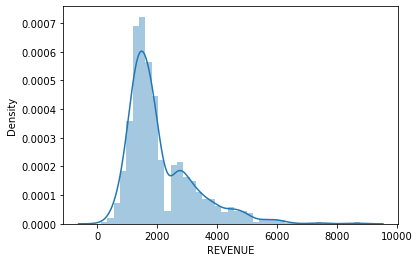

In [15]:
# developing a histogram using distplot
sns.distplot(a = apprentice_df['REVENUE'])

# displaying the histogram
plt.show()

Lets use descriptive statistics to explore each quantitative column by rounding to 2 decimal places.

In [16]:
# descriptive statistics for numeric data
apprentice_df.describe(include = 'number').round(decimals = 2)

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
count,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,2107.29,0.68,74.63,4.9,6.98,5.38,99.60,0.88,1.40,0.17,0.71,5.52,1.48,11.33,1.49,2.97,0.36,0.11,150.56,4.44,0.60,2.79,13.51,106.43
std,1138.29,0.47,55.31,2.5,2.28,3.04,62.34,0.33,1.55,0.43,0.45,0.58,0.53,13.57,2.32,2.74,0.48,0.32,49.45,1.55,0.64,0.76,2.33,181.01
min,131.00,0.00,11.00,1.0,1.00,1.00,10.33,0.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,33.40,1.00,0.00,1.00,5.00,0.00
25%,1350.00,0.00,39.00,3.0,5.00,3.00,72.00,1.00,0.00,0.00,0.00,5.00,1.00,1.00,0.00,1.00,0.00,0.00,114.40,3.00,0.00,2.00,12.00,0.00
50%,1740.00,1.00,60.00,5.0,7.00,5.00,94.16,1.00,1.00,0.00,1.00,6.00,1.00,7.00,0.00,2.00,0.00,0.00,145.60,4.00,1.00,3.00,13.00,0.00
75%,2670.00,1.00,95.00,7.0,8.00,8.00,117.29,1.00,2.00,0.00,1.00,6.00,2.00,13.00,3.00,4.00,1.00,0.00,173.78,5.00,1.00,3.00,15.00,174.00
max,8793.75,1.00,493.00,19.0,18.00,10.00,1645.60,1.00,13.00,3.00,1.00,7.00,3.00,52.00,9.00,19.00,1.00,1.00,564.20,11.00,3.00,5.00,19.00,1600.00


After exploring quantitative columns, I am going to group my variables based on their data types.

In [17]:
Continuous
-----------
REVENUE (Y-variable)
AVG_TIME_PER_SITE_VISIT
AVG_PREP_VID_TIME
TOTAL_MEALS_ORDERED 


Interval/Count
--------------       
UNIQUE_MEALS_PURCH 
CONTACTS_W_CUSTOMER_SERVICE   
PRODUCT_CATEGORIES_VIEWED
CANCELLATIONS_BEFORE_NOON
CANCELLATIONS_AFTER_NOON
PC_LOGINS
MOBILE_LOGINS
WEEKLY_PLAN
EARLY_DELIVERIES
LATE_DELIVERIES
LARGEST_ORDER_SIZE
MASTER_CLASSES_ATTENDED
MEDIAN_MEAL_RATING
AVG_CLICKS_PER_VISIT
TOTAL_PHOTOS_VIEWED


Categorical
-----------
NAME 
EMAIL                        
FIRST_NAME                 
FAMILY_NAME 


Binary
-----------
CROSS_SELL_SUCCESS
TASTES_AND_PREFERENCES
MOBILE_NUMBER
PACKAGE_LOCKER
REFRIGERATED_LOCKER

SyntaxError: invalid syntax (<ipython-input-17-fef18c8f4114>, line 2)

I am going to create lists of features based on their data types for further use.

In [18]:
# creating a list of continuous features (including Revenue)
continuous_data = ['REVENUE', 'AVG_TIME_PER_SITE_VISIT', 'AVG_PREP_VID_TIME', 'TOTAL_MEALS_ORDERED']

# creating a list of count/interval features 
count_data = ['REVENUE', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE',
                   'PRODUCT_CATEGORIES_VIEWED', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON',
                   'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 
                   'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 
                   'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED']

# creating a list of binary features 
binary_data = ['REVENUE','CROSS_SELL_SUCCESS', 'TASTES_AND_PREFERENCES', 'MOBILE_NUMBER',
                   'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER']

## Correlations and Initial Base Model Development

I am going to develop a very basic linear model based on the feature correlations with revenue, so that later I can observe the predictive value of the steps I skipped.

In [19]:
# developing a correlation matrix based on continuous features
continuous_corr = apprentice_df[continuous_data].corr(method = 'pearson')
# filtering the results to only show correlations with Revenue
continuous_corr.loc[ : , 'REVENUE'].round(decimals = 2).sort_values(ascending = False)

REVENUE                    1.00
AVG_PREP_VID_TIME          0.64
TOTAL_MEALS_ORDERED        0.60
AVG_TIME_PER_SITE_VISIT    0.14
Name: REVENUE, dtype: float64

In [20]:
# developing a correlation matrix based on count/interval features
count_corr = apprentice_df[count_data].corr(method = 'pearson')
# filtering the results to only show correlations with Revenue
count_corr.loc[ : , 'REVENUE'].round(decimals = 2).sort_values(ascending = False)

REVENUE                        1.00
MEDIAN_MEAL_RATING             0.61
TOTAL_PHOTOS_VIEWED            0.47
MASTER_CLASSES_ATTENDED        0.45
LARGEST_ORDER_SIZE             0.44
CONTACTS_W_CUSTOMER_SERVICE    0.10
PRODUCT_CATEGORIES_VIEWED      0.03
PC_LOGINS                      0.02
WEEKLY_PLAN                    0.01
CANCELLATIONS_BEFORE_NOON      0.01
EARLY_DELIVERIES              -0.00
LATE_DELIVERIES               -0.01
MOBILE_LOGINS                 -0.02
CANCELLATIONS_AFTER_NOON      -0.04
UNIQUE_MEALS_PURCH            -0.06
AVG_CLICKS_PER_VISIT          -0.55
Name: REVENUE, dtype: float64

In [21]:
# developing a correlation matrix based on binary features
binary_corr = apprentice_df[binary_data].corr(method = 'pearson')
# filtering the results to only show correlations with Revenue
binary_corr.loc[ : , 'REVENUE'].round(decimals = 2).sort_values(ascending = False)

REVENUE                   1.00
MOBILE_NUMBER             0.03
TASTES_AND_PREFERENCES    0.01
REFRIGERATED_LOCKER      -0.00
CROSS_SELL_SUCCESS        0.00
PACKAGE_LOCKER           -0.01
Name: REVENUE, dtype: float64

I am going to build initial base model using the highest correlated columns.

In [22]:
# Step 1: INSTANTIATE a model object (base model)
lm_base = smf.ols(formula =  """REVENUE ~ AVG_PREP_VID_TIME +
                                             TOTAL_MEALS_ORDERED +
                                             MEDIAN_MEAL_RATING +
                                             TOTAL_PHOTOS_VIEWED +
                                             LARGEST_ORDER_SIZE +
                                             CONTACTS_W_CUSTOMER_SERVICE  +
                                             MASTER_CLASSES_ATTENDED
                                             """,
                                data = apprentice_df)


# Step 2: FIT the data into the model object
results = lm_base.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     443.8
Date:                Wed, 27 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:08:08   Log-Likelihood:                -15525.
No. Observations:                1946   AIC:                         3.107e+04
Df Residuals:                    1938   BIC:                         3.111e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

To get a better Adj R-sqrd value, I will use log transformation for revenue due to the skewness in the histogram.

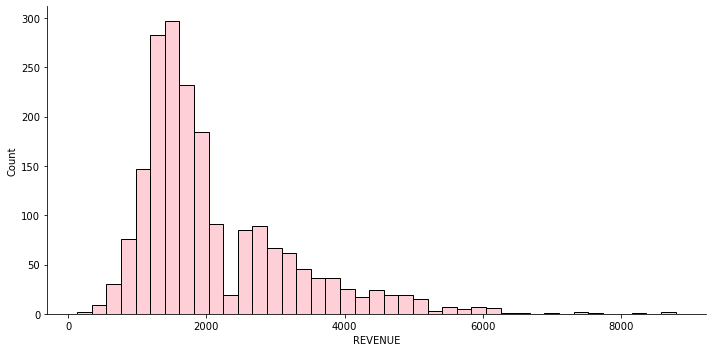

In [23]:
# I coded this while you were in breakout rooms
sns.displot(data = apprentice_df,
            x = 'REVENUE',
            height = 5,
            aspect = 2,
            color = 'pink')

plt.show()

In [24]:
# log transforming Sale_Price and saving it to the dataset
apprentice_df['log_REVENUE'] = np.log10(apprentice_df['REVENUE'])

We reached to a better normal distribution for revenue by using log transformation.

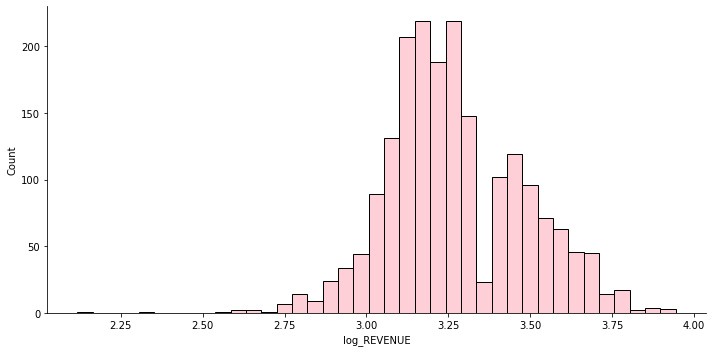

In [25]:
sns.displot(data = apprentice_df,
            x = 'log_REVENUE',
            height = 5,
            aspect = 2,
            color = 'pink')

plt.show()

In [26]:
# Step 1: INSTANTIATE a model object (base model)
lm_base = smf.ols(formula =  """log_REVENUE ~ AVG_PREP_VID_TIME +
                                             TOTAL_MEALS_ORDERED +
                                             MEDIAN_MEAL_RATING +
                                             TOTAL_PHOTOS_VIEWED +
                                             LARGEST_ORDER_SIZE +
                                             CONTACTS_W_CUSTOMER_SERVICE  +
                                             MASTER_CLASSES_ATTENDED
                                             """,
                                data = apprentice_df)


# Step 2: FIT the data into the model object
results = lm_base.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            log_REVENUE   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     491.8
Date:                Wed, 27 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:08:10   Log-Likelihood:                 1253.2
No. Observations:                1946   AIC:                            -2490.
Df Residuals:                    1938   BIC:                            -2446.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

Slight improvement for Adj R-square can be seen after doing log transformation for revenue. Yet, we will get into feature engineering for better results.

## Feature Engineering
Feature Engineering is to help to boost the performance of the model. By the help of steps I take in the feature engineering, I will create series of new features out of the data that I currently have which is going to rise the model accuracy.
### Missing Value Analysis and Imputation

Starting feature engineering by writing a code to check missing values in the dataset.

In [27]:
# checking missing values per column
apprentice_df.isnull().sum(axis = 0)

REVENUE                         0
CROSS_SELL_SUCCESS              0
NAME                            0
EMAIL                           0
FIRST_NAME                      0
FAMILY_NAME                    47
TOTAL_MEALS_ORDERED             0
UNIQUE_MEALS_PURCH              0
CONTACTS_W_CUSTOMER_SERVICE     0
PRODUCT_CATEGORIES_VIEWED       0
AVG_TIME_PER_SITE_VISIT         0
MOBILE_NUMBER                   0
CANCELLATIONS_BEFORE_NOON       0
CANCELLATIONS_AFTER_NOON        0
TASTES_AND_PREFERENCES          0
PC_LOGINS                       0
MOBILE_LOGINS                   0
WEEKLY_PLAN                     0
EARLY_DELIVERIES                0
LATE_DELIVERIES                 0
PACKAGE_LOCKER                  0
REFRIGERATED_LOCKER             0
AVG_PREP_VID_TIME               0
LARGEST_ORDER_SIZE              0
MASTER_CLASSES_ATTENDED         0
MEDIAN_MEAL_RATING              0
AVG_CLICKS_PER_VISIT            0
TOTAL_PHOTOS_VIEWED             0
log_REVENUE                     0
dtype: int64

There is only one categorical column with missing values. Since Family Name doesn't seem to be strongly related to revenue, imputing at "None" would be appropriate.

In [28]:
fill = 'None'
# imputing 'FAMILY_NAME'
apprentice_df['FAMILY_NAME'] = apprentice_df['FAMILY_NAME'].fillna(fill)

In [29]:
# making sure all missing values have been taken care of
apprentice_df.isnull().any(axis = 0).any(axis = 0)

False

### Working With Emails

Next I will work on email column to generalize each column to identify patterns and trends.

In [30]:
# STEP 1: splitting emails
# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in apprentice_df.iterrows():
    
    # splitting email domain at '@'
    split_email = apprentice_df.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)
#printing the split dataset
email_df

,0,1
0,saathos,unitedhealth.com
1,alysanne.osgrey,ge.org
2,edwyd.fossoway,jnj.com
3,eleyna.westerling,ge.org
4,elyn.norridge,jnj.com
...,...,...
1941,obara.sand,yahoo.com
1942,quentyn.blackwood,yahoo.com
1943,rhonda.rowan,gmail.com
1944,turnip,yahoo.com


Printing value counts for each domain.

In [31]:
email_df[1].value_counts().sort_index()

amex.com             30
aol.com              69
apple.com            27
boeing.com           23
caterpillar.com      22
chevron.com          25
cisco.com            18
cocacola.com         28
disney.com           21
dupont.com           26
exxon.com            24
ge.org               26
gmail.com           303
goldmansacs.com      18
homedepot.com        17
hotmail.com          63
ibm.com              26
intel.com            17
jnj.com              28
jpmorgan.com         19
live.com             62
mcdonalds.com        28
me.com               59
merck.com            28
microsoft.com        25
mmm.com              22
msn.com              72
nike.com             27
passport.com         64
pfizer.com           20
pg.com               22
protonmail.com      284
travelers.com        24
unitedhealth.com     24
unitedtech.com       18
verizon.com          22
visa.com             20
walmart.com          21
yahoo.com           274
Name: 1, dtype: int64

Below code groups all email observations according to email domains. Domain groups created based on the table given in the case.

In [32]:
#Setting Personal, Professional and Spam Emails
personal_emails      = ['@gmail.com','@yahoo.com','@protonmail.com']

professional_emails  = ['@mmm.com','@amex.com','@apple.com','@boeing.com','@caterpillar.com','@chevron.com',
                        '@cisco.com','@cocacola.com','@disney.com','@dupont.com','@exxon.com','@ge.org',
                        '@goldmansacs.com','@homedepot.com','@ibm.com','@intel.com','@jnj.com','@jpmorgan.com',
                        '@mcdonalds.com','@merck.com','@microsoft.com','@nike.com','@pfizer.com','@pg.com',
                        '@travelers.com','@unitedtech.com','@unitedhealth.com','@verizon.com','@visa.com','@walmart.com']

spam_emails       = ['@me.com','@aol.com','@hotmail.com','@live.com','@msn.com','@passport.com']

# placeholder list
placeholder_lst = []

# looping to group observations by domain type
for domain in email_df[1]:
        if '@' + domain in personal_emails:
            placeholder_lst.append('PERSONAL')
            
        elif '@' + domain in professional_emails:
            placeholder_lst.append('PROFESSIONAL')
           
        elif '@' + domain in spam_emails:
            placeholder_lst.append('SPAM')
            
        else:
                print('UNKOWN')

# concatenating with original DataFrame
apprentice_df['domain_group'] = pd.Series(placeholder_lst)

# checking results
apprentice_df['domain_group'].value_counts()

PERSONAL        861
PROFESSIONAL    696
SPAM            389
Name: domain_group, dtype: int64

As I grouped emails according to their domain type, I am going to use get dummies function to create new columns with them.

In [33]:
#Creating dummies for Emails
one_hot_email      = pd.get_dummies(apprentice_df['domain_group'])
#Dropping EMAIL and domain_group from original_df
apprentice_df        = apprentice_df.drop('domain_group', axis = 1)
apprentice_df        = apprentice_df.drop('EMAIL', axis = 1)
#Joining the dummies to original_df
apprentice_df        = apprentice_df.join([one_hot_email])

#checking if my new column for email types is actually added to dataframe
print(apprentice_df.columns)

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'FIRST_NAME', 'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE',
       'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 'log_REVENUE', 'PERSONAL', 'PROFESSIONAL', 'SPAM'],
      dtype='object')


### Data Visualization and Trend Based Feature Engineering

In this section, I will identify trends and tresholds by using data visualization.

#### Scatterplots
Our goal here is to identify where a variable's trend changes in terms of its relationship with what we are trying to predict.

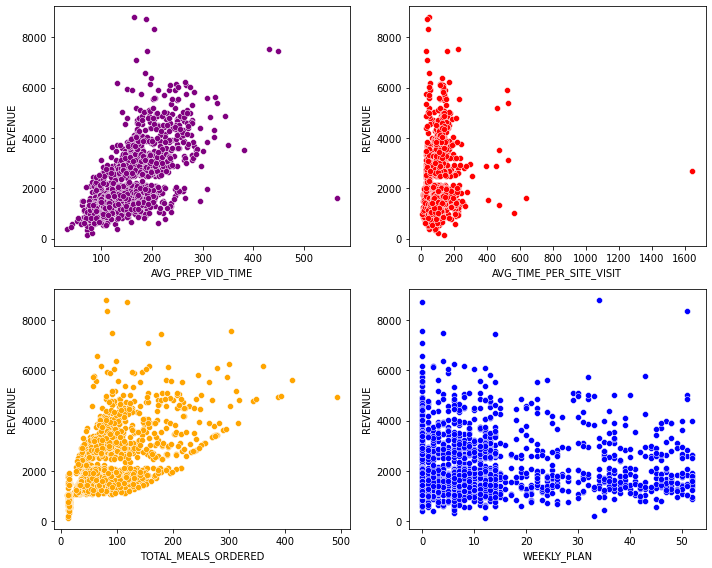

Text(0.5, 0, 'TOTAL_PHOTOS_VIEWED')

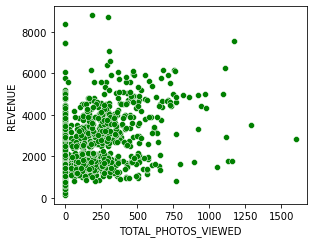

In [34]:
########################
# Visual EDA (Scatterplots)
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = apprentice_df['AVG_PREP_VID_TIME'],
                y = apprentice_df['REVENUE'],
                color = 'purple')
plt.xlabel('AVG_PREP_VID_TIME')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = apprentice_df['AVG_TIME_PER_SITE_VISIT'],
                y = apprentice_df['REVENUE'],
                color = 'r')
plt.xlabel('AVG_TIME_PER_SITE_VISIT')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = apprentice_df['TOTAL_MEALS_ORDERED'],
                y = apprentice_df['REVENUE'],
                color = 'orange')
plt.xlabel('TOTAL_MEALS_ORDERED')

########################
plt.subplot(2, 2, 4)
sns.scatterplot(x = apprentice_df['WEEKLY_PLAN'],
                y = apprentice_df['REVENUE'],
                color = 'blue')
plt.xlabel('WEEKLY_PLAN')
plt.tight_layout()
plt.show()

########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = apprentice_df['TOTAL_PHOTOS_VIEWED'],
                y = apprentice_df['REVENUE'],
                color = 'green')
plt.xlabel('TOTAL_PHOTOS_VIEWED')

########################


#### Boxplots (Interval/Count Data)

Scatterplots can be confusing when working with interval/count data. I am going to move on and use boxplots to identify trends/flags for interlval/count variables in the dataset.

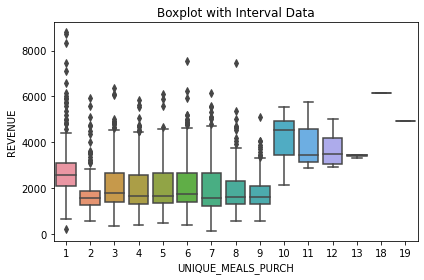

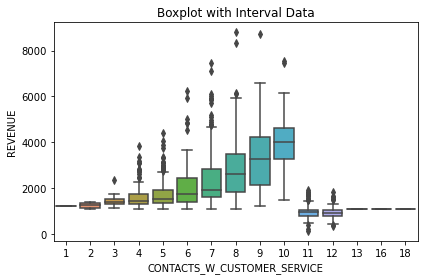

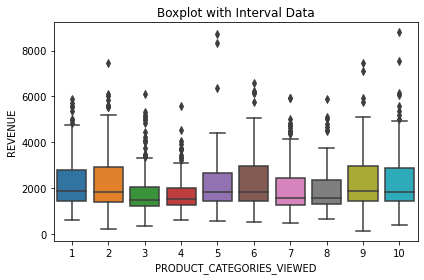

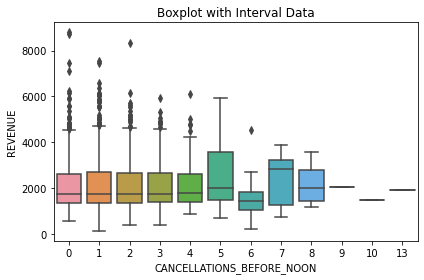

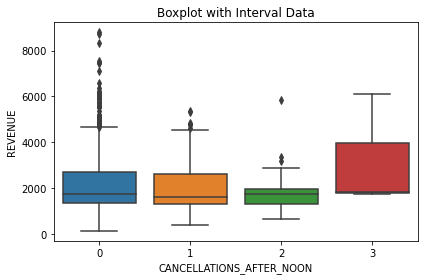

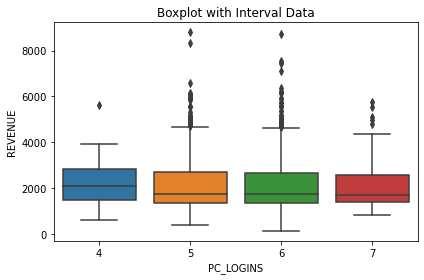

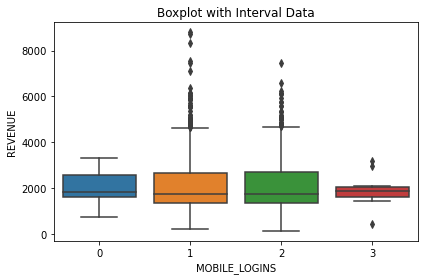

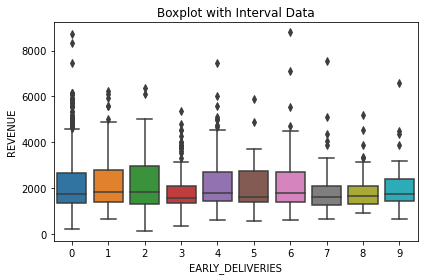

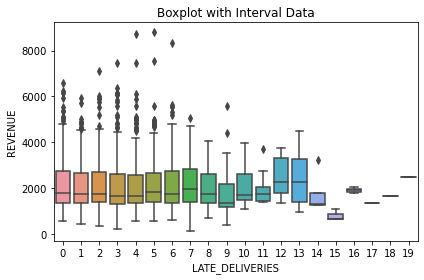

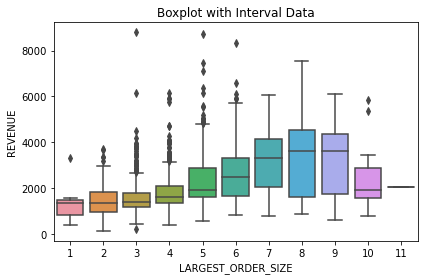

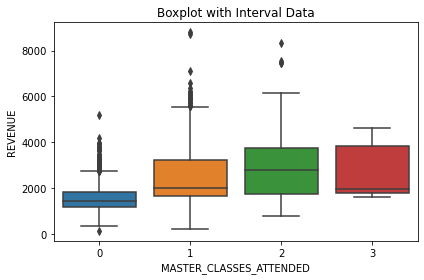

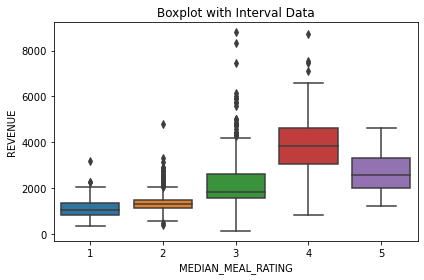

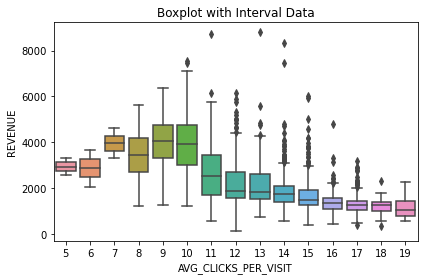

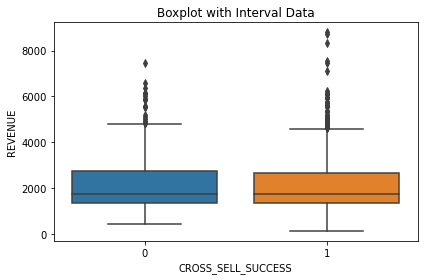

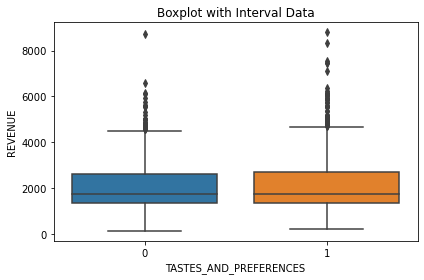

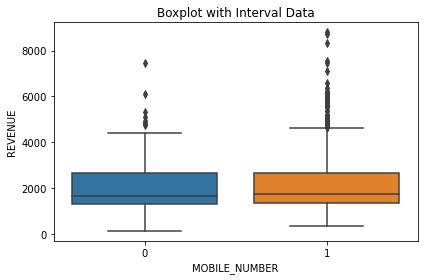

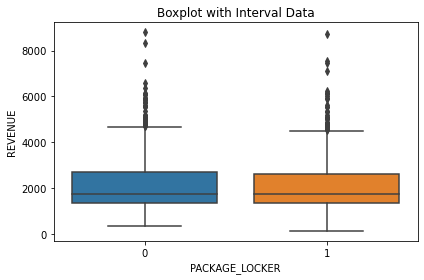

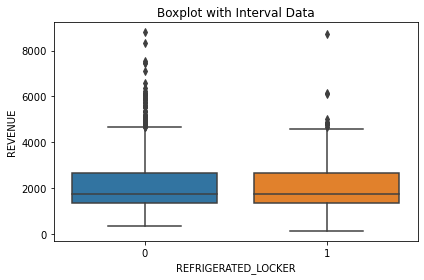

In [35]:
########################
# Visual EDA (Boxplots) -For Interval, Count, Binary Data
########################
# developing a boxplot
sns.boxplot(x    = 'UNIQUE_MEALS_PURCH',
            y    = 'REVENUE',
            data = apprentice_df)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'UNIQUE_MEALS_PURCH')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.tight_layout()
plt.show()


########################
# developing a boxplot
sns.boxplot(x    = 'CONTACTS_W_CUSTOMER_SERVICE',
            y    = 'REVENUE',
            data = apprentice_df)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'CONTACTS_W_CUSTOMER_SERVICE')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.tight_layout()
plt.show()


########################
# developing a boxplot
sns.boxplot(x    = 'PRODUCT_CATEGORIES_VIEWED',
            y    = 'REVENUE',
            data = apprentice_df)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'PRODUCT_CATEGORIES_VIEWED')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.tight_layout()
plt.show()

########################
# developing a boxplot
sns.boxplot(x    = 'CANCELLATIONS_BEFORE_NOON',
            y    = 'REVENUE',
            data = apprentice_df)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'CANCELLATIONS_BEFORE_NOON')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.tight_layout()
plt.show()

########################
# developing a boxplot
sns.boxplot(x    = 'CANCELLATIONS_AFTER_NOON',
            y    = 'REVENUE',
            data = apprentice_df)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'CANCELLATIONS_AFTER_NOON')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.tight_layout()
plt.show()

########################
# developing a boxplot
sns.boxplot(x    = 'PC_LOGINS',
            y    = 'REVENUE',
            data = apprentice_df)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'PC_LOGINS')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.tight_layout()
plt.show()

########################
# developing a boxplot
sns.boxplot(x    = 'MOBILE_LOGINS',
            y    = 'REVENUE',
            data = apprentice_df)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'MOBILE_LOGINS')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.tight_layout()
plt.show()


########################
# developing a boxplot
sns.boxplot(x    = 'EARLY_DELIVERIES',
            y    = 'REVENUE',
            data = apprentice_df)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'EARLY_DELIVERIES')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.tight_layout()
plt.show()


########################
# developing a boxplot
sns.boxplot(x    = 'LATE_DELIVERIES',
            y    = 'REVENUE',
            data = apprentice_df)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'LATE_DELIVERIES')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.tight_layout()
plt.show()

########################


# developing a boxplot
sns.boxplot(x    = 'LARGEST_ORDER_SIZE',
            y    = 'REVENUE',
            data = apprentice_df)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'LARGEST_ORDER_SIZE')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.tight_layout()
plt.show()

########################


# developing a boxplot
sns.boxplot(x    = 'MASTER_CLASSES_ATTENDED',
            y    = 'REVENUE',
            data = apprentice_df)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'MASTER_CLASSES_ATTENDED')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.tight_layout()
plt.show()

########################


# developing a boxplot
sns.boxplot(x    = 'MEDIAN_MEAL_RATING',
            y    = 'REVENUE',
            data = apprentice_df)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'MEDIAN_MEAL_RATING')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.tight_layout()
plt.show()

########################


# developing a boxplot
sns.boxplot(x    = 'AVG_CLICKS_PER_VISIT',
            y    = 'REVENUE',
            data = apprentice_df)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'AVG_CLICKS_PER_VISIT')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.tight_layout()
plt.show()

# developing a boxplot
sns.boxplot(x    = 'CROSS_SELL_SUCCESS',
            y    = 'REVENUE',
            data = apprentice_df)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'CROSS_SELL_SUCCESS')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.tight_layout()
plt.show()

# developing a boxplot
sns.boxplot(x    = 'TASTES_AND_PREFERENCES',
            y    = 'REVENUE',
            data = apprentice_df)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'TASTES_AND_PREFERENCES')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.tight_layout()
plt.show()

# developing a boxplot
sns.boxplot(x    = 'MOBILE_NUMBER',
            y    = 'REVENUE',
            data = apprentice_df)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'MOBILE_NUMBER')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.tight_layout()
plt.show()

# developing a boxplot
sns.boxplot(x    = 'PACKAGE_LOCKER',
            y    = 'REVENUE',
            data = apprentice_df)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'PACKAGE_LOCKER')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.tight_layout()
plt.show()

# developing a boxplot
sns.boxplot(x    = 'REFRIGERATED_LOCKER',
            y    = 'REVENUE',
            data = apprentice_df)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'REFRIGERATED_LOCKER')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.tight_layout()
plt.show()

By analyzing differences in the median lines for each boxplot, I am going to use log transformations for two variables that doesn't show linearity.(LARGEST_ORDER_SIZE and AVG_CLICKS_PER_VISIT)Let's also check the correlations of these new features with revenue.

In [36]:
apprentice_df['log_LARGEST_ORDER_SIZE'] = np.log10(apprentice_df['LARGEST_ORDER_SIZE'])
apprentice_df['log_REVENUE'] = np.log10(apprentice_df['REVENUE'])

log_corr = apprentice_df.loc[ : , ['LARGEST_ORDER_SIZE',
                                    'log_LARGEST_ORDER_SIZE',
                                    'REVENUE',
                                    'log_REVENUE']  ].corr(method = 'pearson')\
                                                 .round(decimals = 2)



log_corr.loc[ ['LARGEST_ORDER_SIZE', 'log_LARGEST_ORDER_SIZE'],
              ['REVENUE', 'log_REVENUE']  ]

,REVENUE,log_REVENUE
LARGEST_ORDER_SIZE,0.44,0.45
log_LARGEST_ORDER_SIZE,0.42,0.45


In [37]:
apprentice_df['log_AVG_CLICKS_PER_VISIT'] = np.log10(apprentice_df['AVG_CLICKS_PER_VISIT'])
apprentice_df['log_REVENUE'] = np.log10(apprentice_df['REVENUE'])

log_corr = apprentice_df.loc[ : , ['AVG_CLICKS_PER_VISIT',
                                    'log_AVG_CLICKS_PER_VISIT',
                                    'REVENUE',
                                    'log_REVENUE']  ].corr(method = 'pearson')\
                                                 .round(decimals = 2)


log_corr.loc[ ['AVG_CLICKS_PER_VISIT', 'log_AVG_CLICKS_PER_VISIT'],
              ['REVENUE', 'log_REVENUE']  ]

,REVENUE,log_REVENUE
AVG_CLICKS_PER_VISIT,-0.55,-0.58
log_AVG_CLICKS_PER_VISIT,-0.56,-0.58


#### Setting Trends
Now I will set tresholds for creating new variables to use in my final model and get better results.

In [38]:
#Trend Based Threshold
CONTACTS_W_CUSTOMER_SERVICE_TREND = 10  #Data drops off after this point
AVG_TIME_PER_SITE_VISIT_TREND     = 175 #Data Drops off before this point
AVG_PREP_VID_TIME_TREND           = 250 #Data Scatters after this point
LARGEST_ORDER_SIZE_TREND          = 5   #Trend change after this point
MASTER_CLASSES_ATTENDED_TREND     = 1   #Trend change after this point
TOTAL_MEALS_ORDERED_TREND         = 20  #Data Drops off before this point
CANCELLATIONS_BEFORE_NOON_TREND   = 0   #Zero
CANCELLATIONS_AFTER_NOON_TREND    = 0   #Zero
WEEKLY_PLAN_TREND                 = 0   #Zero inflated
TOTAL_PHOTOS_VIEWED_TREND         = 0   #Zero inflated
UNIQUE_MEALS_PURCH_TREND1         = 1   #Data is different at 1
UNIQUE_MEALS_PURCH_TREND2         = 10  #Trend change at 1
MEDIAN_MEAL_RATING_TREND1         = 3   #creating different segments for median meal rating (most correlated)
MEDIAN_MEAL_RATING_TREND2         = 4   #creating different segments for median meal rating (most correlated)
MEDIAN_MEAL_RATING_TREND3         = 5   #creating different segments for median meal rating (most correlated)


I am going to check number of observations of both sides of these tresholds. At least 100 observations must be on both sides of the flag.

In [39]:
# counting the number of outliers for scatterplot
CONTACTS_W_CUSTOMER_SERVICE_out     = len(apprentice_df['CONTACTS_W_CUSTOMER_SERVICE'][apprentice_df['CONTACTS_W_CUSTOMER_SERVICE']> 10]) # TOTAL_MEALS_ORDERED
AVG_TIME_PER_SITE_VISIT_out         = len(apprentice_df['AVG_TIME_PER_SITE_VISIT'][apprentice_df['AVG_TIME_PER_SITE_VISIT']> 175]) # AVG_TIME_PER_SITE_VISIT
AVG_PREP_VID_TIME_out               = len(apprentice_df['AVG_PREP_VID_TIME'][apprentice_df['AVG_PREP_VID_TIME']> 250]) # AVG_PREP_VID_TIME
LARGEST_ORDER_SIZE_out              = len(apprentice_df['LARGEST_ORDER_SIZE'][apprentice_df['LARGEST_ORDER_SIZE']> 5])
MASTER_CLASSES_ATTENDED_out         = len(apprentice_df['MASTER_CLASSES_ATTENDED'][apprentice_df['MASTER_CLASSES_ATTENDED']> 1])
TOTAL_MEALS_ORDERED_out             = len(apprentice_df['TOTAL_MEALS_ORDERED'][apprentice_df['TOTAL_MEALS_ORDERED']> 250])
CANCELLATIONS_BEFORE_NOON_out       = len(apprentice_df['CANCELLATIONS_BEFORE_NOON'][apprentice_df['CANCELLATIONS_BEFORE_NOON']> 250])
CANCELLATIONS_AFTER_NOON_out        = len(apprentice_df['CANCELLATIONS_AFTER_NOON'][apprentice_df['CANCELLATIONS_AFTER_NOON']> 250])
WEEKLY_PLAN_out                     = len(apprentice_df['WEEKLY_PLAN'][apprentice_df['WEEKLY_PLAN']> 250])
TOTAL_PHOTOS_VIEWED_out             = len(apprentice_df['TOTAL_PHOTOS_VIEWED'][apprentice_df['TOTAL_PHOTOS_VIEWED']> 250])
UNIQUE_MEALS_PURCH_out              = len(apprentice_df['UNIQUE_MEALS_PURCH'][apprentice_df['UNIQUE_MEALS_PURCH']> 250])
UNIQUE_MEALS_PURCH_out2             = len(apprentice_df['UNIQUE_MEALS_PURCH'][apprentice_df['UNIQUE_MEALS_PURCH']> 250])
MEDIAN_MEAL_RATING_out1             = len(apprentice_df['MEDIAN_MEAL_RATING'][apprentice_df['MEDIAN_MEAL_RATING']> 250])
MEDIAN_MEAL_RATING_out2             = len(apprentice_df['MEDIAN_MEAL_RATING'][apprentice_df['MEDIAN_MEAL_RATING']> 250])
MEDIAN_MEAL_RATING_out3             = len(apprentice_df['MEDIAN_MEAL_RATING'][apprentice_df['MEDIAN_MEAL_RATING']> 250])

# printing a table of the results
print(f"""
                           No\t\tYes
                          ---------------------
TOTAL MEALS ORDERED           | {TOTAL_MEALS_ORDERED_out}\t\t{len(apprentice_df) - TOTAL_MEALS_ORDERED_out}
AVG TIME PER SITE VISIT       | {AVG_TIME_PER_SITE_VISIT_out}\t\t{len(apprentice_df) - AVG_TIME_PER_SITE_VISIT_out}
AVG PREP VID TIME             | {AVG_PREP_VID_TIME_out}\t\t{len(apprentice_df) - AVG_PREP_VID_TIME_out}
LARGEST ORDER SIZE            | {LARGEST_ORDER_SIZE_out}\t\t{len(apprentice_df) - LARGEST_ORDER_SIZE_out}
MASTER_CLASSES_ATTENDED       | {MASTER_CLASSES_ATTENDED_out}\t\t{len(apprentice_df) - MASTER_CLASSES_ATTENDED_out}
CONTACTS_W_CUSTOMER_SERVICE   | {CONTACTS_W_CUSTOMER_SERVICE_out}\t\t{len(apprentice_df) - CONTACTS_W_CUSTOMER_SERVICE_out}
CANCELLATIONS_BEFORE_NOON     | {CANCELLATIONS_BEFORE_NOON_out}\t\t{len(apprentice_df) - CANCELLATIONS_BEFORE_NOON_out}
CANCELLATIONS_AFTER_NOON      | {CANCELLATIONS_AFTER_NOON_out}\t\t{len(apprentice_df) - CANCELLATIONS_AFTER_NOON_out}
WEEKLY_PLAN                   | {WEEKLY_PLAN_out}\t\t{len(apprentice_df) - WEEKLY_PLAN_out}
UNIQUE_MEALS_PURCH            | {UNIQUE_MEALS_PURCH_out}\t\t{len(apprentice_df) - UNIQUE_MEALS_PURCH_out}
MEDIAN_MEAL_RATING            | {MEDIAN_MEAL_RATING_out1}\t\t{len(apprentice_df) - MEDIAN_MEAL_RATING_out1}

""")


                           No		Yes
                          ---------------------
TOTAL MEALS ORDERED           | 33		1913
AVG TIME PER SITE VISIT       | 107		1839
AVG PREP VID TIME             | 80		1866
LARGEST ORDER SIZE            | 0		1946
MASTER_CLASSES_ATTENDED       | 0		1946
CONTACTS_W_CUSTOMER_SERVICE   | 216		1730
CANCELLATIONS_BEFORE_NOON     | 0		1946
CANCELLATIONS_AFTER_NOON      | 0		1946
WEEKLY_PLAN                   | 0		1946
UNIQUE_MEALS_PURCH            | 0		1946
MEDIAN_MEAL_RATING            | 0		1946




#### Creating New Variables
Creating new variables based on the tresholds we've set will enable us to create most accurate model while achieving the highest R-sqr and Adj R-sqr values.

In [40]:
# Contact With Customer Service 

apprentice_df['new_CONTACTS_W_CUSTOMER_SERVICE'] = 0

for index, value in apprentice_df.iterrows():
    if apprentice_df.loc[index, 'CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_TREND:
        apprentice_df.loc[index, 'new_CONTACTS_W_CUSTOMER_SERVICE'] = 1     

# Average Time Spent Per Visit
apprentice_df['new_AVG_TIME_PER_SITE_VISIT'] = 0

for index, value in apprentice_df.iterrows():
    if apprentice_df.loc[index, 'AVG_TIME_PER_SITE_VISIT'] > AVG_TIME_PER_SITE_VISIT_TREND :
        apprentice_df.loc[index, 'new_AVG_TIME_PER_SITE_VISIT'] = 1
        
        
# Average Prep Vid
apprentice_df['new_AVG_PREP_VID_TIME'] = 0

for index, value in apprentice_df.iterrows():
    if apprentice_df.loc[index, 'AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_TREND:
        apprentice_df.loc[index, 'new_AVG_PREP_VID_TIME'] = 1


# Unique Meals Purchased
apprentice_df['new_LARGEST_ORDER_SIZE'] = 0


for index, value in apprentice_df.iterrows():
    if apprentice_df.loc[index, 'LARGEST_ORDER_SIZE'] > LARGEST_ORDER_SIZE_TREND:
        apprentice_df.loc[index, 'new_LARGEST_ORDER_SIZE'] = 1


# Average Clicks Per Visit
apprentice_df['new_MASTER_CLASSES_ATTENDED'] = 0


for index, value in apprentice_df.iterrows():
    if apprentice_df.loc[index, 'MASTER_CLASSES_ATTENDED'] > MASTER_CLASSES_ATTENDED_TREND :
        apprentice_df.loc[index, 'new_MASTER_CLASSES_ATTENDED'] = 1


# Master Classes Attended
apprentice_df['new_TOTAL_MEALS_ORDERED'] = 0

for index, value in apprentice_df.iterrows():
    if apprentice_df.loc[index, 'TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_TREND :
        apprentice_df.loc[index, 'new_TOTAL_MEALS_ORDERED'] = 1


#CANCELLATIONS_BEFORE_NOON
apprentice_df['new_CANCELLATIONS_BEFORE_NOON'] = 0


for index, value in apprentice_df.iterrows():
    if apprentice_df.loc[index, 'CANCELLATIONS_BEFORE_NOON'] == CANCELLATIONS_BEFORE_NOON_TREND:
        apprentice_df.loc[index, 'new_CANCELLATIONS_BEFORE_NOON'] = 1



# Cancellations Before Noon
apprentice_df['new_CANCELLATIONS_AFTER_NOON'] = 0

for index, value in apprentice_df.iterrows():
    if apprentice_df.loc[index, 'CANCELLATIONS_AFTER_NOON'] == CANCELLATIONS_AFTER_NOON_TREND:
        apprentice_df.loc[index, 'new_CANCELLATIONS_AFTER_NOON'] = 1


# Cancellations After Noon
apprentice_df['new_WEEKLY_PLAN'] = 0

for index, value in apprentice_df.iterrows():
    if apprentice_df.loc[index, 'WEEKLY_PLAN'] == WEEKLY_PLAN_TREND:
        apprentice_df.loc[index, 'new_WEEKLY_PLAN'] = 1


# Weekly Plan
apprentice_df['new_TOTAL_PHOTOS_VIEWED'] = 0

for index, value in apprentice_df.iterrows():
    if apprentice_df.loc[index, 'TOTAL_PHOTOS_VIEWED'] == TOTAL_PHOTOS_VIEWED_TREND:
        apprentice_df.loc[index, 'new_TOTAL_PHOTOS_VIEWED'] = 1



# Total Photos Viewed
apprentice_df['new_UNIQUE_MEALS_PURCH'] = 0

for index, value in apprentice_df.iterrows():
    if apprentice_df.loc[index, 'UNIQUE_MEALS_PURCH'] == UNIQUE_MEALS_PURCH_TREND1:
        apprentice_df.loc[index, 'new_UNIQUE_MEALS_PURCH'] = 1


# Median Meal Rating
apprentice_df['new_UNIQUE_MEALS_PURCH2'] = 0

for index, value in apprentice_df.iterrows():
    if apprentice_df.loc[index, 'UNIQUE_MEALS_PURCH'] == UNIQUE_MEALS_PURCH_TREND2:
        apprentice_df.loc[index, 'new_UNIQUE_MEALS_PURCH2'] = 1



apprentice_df['new_MEDIAN_MEAL_RATING1'] = 0

for index, value in apprentice_df.iterrows():
    if apprentice_df.loc[index, 'MEDIAN_MEAL_RATING'] == MEDIAN_MEAL_RATING_TREND1:
        apprentice_df.loc[index, 'new_MEDIAN_MEAL_RATING1'] = 1


apprentice_df['new_MEDIAN_MEAL_RATING2'] = 0

for index, value in apprentice_df.iterrows():
    if apprentice_df.loc[index, 'MEDIAN_MEAL_RATING'] == MEDIAN_MEAL_RATING_TREND2:
        apprentice_df.loc[index, 'new_MEDIAN_MEAL_RATING2'] = 1
        
apprentice_df['new_MEDIAN_MEAL_RATING3'] = 0

for index, value in apprentice_df.iterrows():
    if apprentice_df.loc[index, 'MEDIAN_MEAL_RATING'] == MEDIAN_MEAL_RATING_TREND3:
        apprentice_df.loc[index, 'new_MEDIAN_MEAL_RATING3'] = 1       
              

In [41]:
#checking if my feature engineered columns are added to dataframe
print(apprentice_df.columns)

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'FIRST_NAME', 'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE',
       'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 'log_REVENUE', 'PERSONAL', 'PROFESSIONAL', 'SPAM', 'log_LARGEST_ORDER_SIZE', 'log_AVG_CLICKS_PER_VISIT', 'new_CONTACTS_W_CUSTOMER_SERVICE', 'new_AVG_TIME_PER_SITE_VISIT', 'new_AVG_PREP_VID_TIME', 'new_LARGEST_ORDER_SIZE', 'new_MASTER_CLASSES_ATTENDED', 'new_TOTAL_MEALS_ORDERED', 'new_CANCELLATIONS_BEFORE_NOON', 'new_CANCELLATIONS_AFTER_NOON', 'new_WEEKLY_PLAN', 'new_TOTAL_PHOTOS_VIEWED',
       'new_UNIQUE_MEALS_PURC

In [42]:
#checking results
apprentice_df[['new_CONTACTS_W_CUSTOMER_SERVICE', 'new_AVG_TIME_PER_SITE_VISIT', 'new_AVG_PREP_VID_TIME', 
            'new_LARGEST_ORDER_SIZE', 'new_MASTER_CLASSES_ATTENDED', 'new_TOTAL_MEALS_ORDERED', 
            'new_CANCELLATIONS_BEFORE_NOON', 'new_CANCELLATIONS_AFTER_NOON', 'new_WEEKLY_PLAN', 
            'new_TOTAL_PHOTOS_VIEWED','new_UNIQUE_MEALS_PURCH', 'new_UNIQUE_MEALS_PURCH2', 
            'new_MEDIAN_MEAL_RATING1', 'new_MEDIAN_MEAL_RATING2', 'new_MEDIAN_MEAL_RATING3']].head(n=10)

,new_CONTACTS_W_CUSTOMER_SERVICE,new_AVG_TIME_PER_SITE_VISIT,new_AVG_PREP_VID_TIME,new_LARGEST_ORDER_SIZE,new_MASTER_CLASSES_ATTENDED,new_TOTAL_MEALS_ORDERED,new_CANCELLATIONS_BEFORE_NOON,new_CANCELLATIONS_AFTER_NOON,new_WEEKLY_PLAN,new_TOTAL_PHOTOS_VIEWED,new_UNIQUE_MEALS_PURCH,new_UNIQUE_MEALS_PURCH2,new_MEDIAN_MEAL_RATING1,new_MEDIAN_MEAL_RATING2,new_MEDIAN_MEAL_RATING3
0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0
5,0,1,0,0,0,1,0,1,1,1,0,0,1,0,0
6,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
7,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0
8,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0
9,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0


As I created and added new variables based on the tresholds, now I need to see how these new features are related to revenue.

In [43]:
# Checking the correlations of the new values with revenue
trend_corr = apprentice_df.corr()
trend_corr.loc['REVENUE',['new_CONTACTS_W_CUSTOMER_SERVICE', 'new_AVG_TIME_PER_SITE_VISIT', 'new_AVG_PREP_VID_TIME', 
            'new_LARGEST_ORDER_SIZE', 'new_MASTER_CLASSES_ATTENDED', 'new_TOTAL_MEALS_ORDERED', 
            'new_CANCELLATIONS_BEFORE_NOON', 'new_CANCELLATIONS_AFTER_NOON', 'new_WEEKLY_PLAN', 
            'new_TOTAL_PHOTOS_VIEWED','new_UNIQUE_MEALS_PURCH', 'new_UNIQUE_MEALS_PURCH2', 
            'new_MEDIAN_MEAL_RATING1', 'new_MEDIAN_MEAL_RATING2', 'new_MEDIAN_MEAL_RATING3']].sort_values(ascending = False)

new_MEDIAN_MEAL_RATING2            0.593672
new_AVG_PREP_VID_TIME              0.366677
new_TOTAL_MEALS_ORDERED            0.358802
new_LARGEST_ORDER_SIZE             0.356091
new_MASTER_CLASSES_ATTENDED        0.221534
new_UNIQUE_MEALS_PURCH             0.210872
new_UNIQUE_MEALS_PURCH2            0.107052
new_CANCELLATIONS_AFTER_NOON       0.040339
new_MEDIAN_MEAL_RATING3            0.037457
new_WEEKLY_PLAN                    0.032196
new_AVG_TIME_PER_SITE_VISIT        0.027340
new_MEDIAN_MEAL_RATING1            0.003315
new_CANCELLATIONS_BEFORE_NOON     -0.024267
new_CONTACTS_W_CUSTOMER_SERVICE   -0.359522
new_TOTAL_PHOTOS_VIEWED           -0.372072
Name: REVENUE, dtype: float64

Adding each variable one-by-one would be a long process. Instead, I will use  a loop that will print each explanatory variable.

In [44]:
# making a copy of housing
apprentice_df_explanatory = apprentice_df.copy()
# dropping SalePrice and Order from the explanatory variable set
apprentice_df_explanatory = apprentice_df_explanatory.drop(['REVENUE','log_REVENUE',
                                                'NAME', 'FIRST_NAME', 'FAMILY_NAME'], axis = 1)
# formatting each explanatory variable for statsmodels
for val in apprentice_df_explanatory:
    print(f"{val} +")

CROSS_SELL_SUCCESS +
TOTAL_MEALS_ORDERED +
UNIQUE_MEALS_PURCH +
CONTACTS_W_CUSTOMER_SERVICE +
PRODUCT_CATEGORIES_VIEWED +
AVG_TIME_PER_SITE_VISIT +
MOBILE_NUMBER +
CANCELLATIONS_BEFORE_NOON +
CANCELLATIONS_AFTER_NOON +
TASTES_AND_PREFERENCES +
PC_LOGINS +
MOBILE_LOGINS +
WEEKLY_PLAN +
EARLY_DELIVERIES +
LATE_DELIVERIES +
PACKAGE_LOCKER +
REFRIGERATED_LOCKER +
AVG_PREP_VID_TIME +
LARGEST_ORDER_SIZE +
MASTER_CLASSES_ATTENDED +
MEDIAN_MEAL_RATING +
AVG_CLICKS_PER_VISIT +
TOTAL_PHOTOS_VIEWED +
PERSONAL +
PROFESSIONAL +
SPAM +
log_LARGEST_ORDER_SIZE +
log_AVG_CLICKS_PER_VISIT +
new_CONTACTS_W_CUSTOMER_SERVICE +
new_AVG_TIME_PER_SITE_VISIT +
new_AVG_PREP_VID_TIME +
new_LARGEST_ORDER_SIZE +
new_MASTER_CLASSES_ATTENDED +
new_TOTAL_MEALS_ORDERED +
new_CANCELLATIONS_BEFORE_NOON +
new_CANCELLATIONS_AFTER_NOON +
new_WEEKLY_PLAN +
new_TOTAL_PHOTOS_VIEWED +
new_UNIQUE_MEALS_PURCH +
new_UNIQUE_MEALS_PURCH2 +
new_MEDIAN_MEAL_RATING1 +
new_MEDIAN_MEAL_RATING2 +
new_MEDIAN_MEAL_RATING3 +


## Developing Full Model

### Full Model with Revenue
I will create first full model using all of the variables outputted from the loop.

In [45]:
# Building a full-model
lm_full = smf.ols(formula =  """REVENUE ~ CROSS_SELL_SUCCESS +
                                            TOTAL_MEALS_ORDERED +
                                            UNIQUE_MEALS_PURCH +
                                            CONTACTS_W_CUSTOMER_SERVICE +
                                            PRODUCT_CATEGORIES_VIEWED +
                                            AVG_TIME_PER_SITE_VISIT +
                                            MOBILE_NUMBER +
                                            CANCELLATIONS_BEFORE_NOON +
                                            CANCELLATIONS_AFTER_NOON +
                                            TASTES_AND_PREFERENCES +
                                            PC_LOGINS +
                                            MOBILE_LOGINS +
                                            WEEKLY_PLAN +
                                            EARLY_DELIVERIES +
                                            LATE_DELIVERIES +
                                            PACKAGE_LOCKER +
                                            REFRIGERATED_LOCKER +
                                            AVG_PREP_VID_TIME +
                                            LARGEST_ORDER_SIZE +
                                            MASTER_CLASSES_ATTENDED +
                                            MEDIAN_MEAL_RATING +
                                            AVG_CLICKS_PER_VISIT +
                                            TOTAL_PHOTOS_VIEWED +
                                            PERSONAL +
                                            PROFESSIONAL +
                                            SPAM +
                                            log_LARGEST_ORDER_SIZE +
                                            log_AVG_CLICKS_PER_VISIT +
                                            new_CONTACTS_W_CUSTOMER_SERVICE +
                                            new_AVG_TIME_PER_SITE_VISIT +
                                            new_AVG_PREP_VID_TIME +
                                            new_LARGEST_ORDER_SIZE +
                                            new_MASTER_CLASSES_ATTENDED +
                                            new_TOTAL_MEALS_ORDERED +
                                            new_CANCELLATIONS_BEFORE_NOON +
                                            new_CANCELLATIONS_AFTER_NOON +
                                            new_WEEKLY_PLAN +
                                            new_TOTAL_PHOTOS_VIEWED +
                                            new_UNIQUE_MEALS_PURCH +
                                            new_UNIQUE_MEALS_PURCH2 +
                                            new_MEDIAN_MEAL_RATING1 +
                                            new_MEDIAN_MEAL_RATING2 +
                                            new_MEDIAN_MEAL_RATING3 """,
                                  data = apprentice_df)

# Step 2: FIT the data into the model object
results = lm_full.fit()

# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     151.7
Date:                Wed, 27 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:08:26   Log-Likelihood:                -15025.
No. Observations:                1946   AIC:                         3.014e+04
Df Residuals:                    1903   BIC:                         3.038e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

### Full Model with Log Revenue 
As we landed on better results with log transformed revenue on our base model, here I ran our first full model with transformed revenue which increased the adj R-sqr from 0.770 to 0.817.


In [46]:
# Building a full-model
lm_full = smf.ols(formula =  """log_REVENUE ~ CROSS_SELL_SUCCESS +
                                            TOTAL_MEALS_ORDERED +
                                            UNIQUE_MEALS_PURCH +
                                            CONTACTS_W_CUSTOMER_SERVICE +
                                            PRODUCT_CATEGORIES_VIEWED +
                                            AVG_TIME_PER_SITE_VISIT +
                                            MOBILE_NUMBER +
                                            CANCELLATIONS_BEFORE_NOON +
                                            CANCELLATIONS_AFTER_NOON +
                                            TASTES_AND_PREFERENCES +
                                            PC_LOGINS +
                                            MOBILE_LOGINS +
                                            WEEKLY_PLAN +
                                            EARLY_DELIVERIES +
                                            LATE_DELIVERIES +
                                            PACKAGE_LOCKER +
                                            REFRIGERATED_LOCKER +
                                            AVG_PREP_VID_TIME +
                                            LARGEST_ORDER_SIZE +
                                            MASTER_CLASSES_ATTENDED +
                                            MEDIAN_MEAL_RATING +
                                            AVG_CLICKS_PER_VISIT +
                                            TOTAL_PHOTOS_VIEWED +
                                            PERSONAL +
                                            PROFESSIONAL +
                                            SPAM +
                                            log_LARGEST_ORDER_SIZE +
                                            log_AVG_CLICKS_PER_VISIT +
                                            new_CONTACTS_W_CUSTOMER_SERVICE +
                                            new_AVG_TIME_PER_SITE_VISIT +
                                            new_AVG_PREP_VID_TIME +
                                            new_LARGEST_ORDER_SIZE +
                                            new_MASTER_CLASSES_ATTENDED +
                                            new_TOTAL_MEALS_ORDERED +
                                            new_CANCELLATIONS_BEFORE_NOON +
                                            new_CANCELLATIONS_AFTER_NOON +
                                            new_WEEKLY_PLAN +
                                            new_TOTAL_PHOTOS_VIEWED +
                                            new_UNIQUE_MEALS_PURCH +
                                            new_UNIQUE_MEALS_PURCH2 +
                                            new_MEDIAN_MEAL_RATING1 +
                                            new_MEDIAN_MEAL_RATING2 +
                                            new_MEDIAN_MEAL_RATING3 """,
                                  data = apprentice_df)

# Step 2: FIT the data into the model object
results = lm_full.fit()

# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            log_REVENUE   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     202.2
Date:                Wed, 27 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:08:26   Log-Likelihood:                 1911.9
No. Observations:                1946   AIC:                            -3738.
Df Residuals:                    1903   BIC:                            -3498.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In the next step I will take the variables away which are insignificant for our model. (p-value < 0.05)

In [47]:
# Building a full-model
lm_full = smf.ols(formula =  """log_REVENUE ~ TOTAL_MEALS_ORDERED +
                                            CONTACTS_W_CUSTOMER_SERVICE +
                                            AVG_TIME_PER_SITE_VISIT +
                                            AVG_PREP_VID_TIME +
                                            LARGEST_ORDER_SIZE +
                                            MASTER_CLASSES_ATTENDED +
                                            MEDIAN_MEAL_RATING +
                                            PERSONAL +
                                            PROFESSIONAL +
                                            SPAM +
                                            log_LARGEST_ORDER_SIZE +
                                            new_CONTACTS_W_CUSTOMER_SERVICE +
                                            new_TOTAL_MEALS_ORDERED +
                                            new_TOTAL_PHOTOS_VIEWED +
                                            new_UNIQUE_MEALS_PURCH +
                                            new_MEDIAN_MEAL_RATING2 """,
                                  data = apprentice_df)

# Step 2: FIT the data into the model object
results = lm_full.fit()

# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            log_REVENUE   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     558.5
Date:                Wed, 27 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:08:27   Log-Likelihood:                 1889.8
No. Observations:                1946   AIC:                            -3748.
Df Residuals:                    1930   BIC:                            -3658.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In order to work with statsmodels, I need to concatenate our training data on the 'x' side (X_train) and our training data on the 'y' side (y_train). Then, I can begin building models and analyze their results. First I will test the best model from our previous session to see how it performs. My goal here is to ensure that the p-values are still significant after splitting the dataset.

In [48]:
# declaring set of x-variables with only significant variables
x_variables = ['TOTAL_MEALS_ORDERED','CONTACTS_W_CUSTOMER_SERVICE', 'AVG_TIME_PER_SITE_VISIT', 'AVG_PREP_VID_TIME',
               'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'PERSONAL', 'PROFESSIONAL',
                'SPAM', 'log_LARGEST_ORDER_SIZE', 'new_CONTACTS_W_CUSTOMER_SERVICE', 'new_TOTAL_MEALS_ORDERED',
                'new_TOTAL_PHOTOS_VIEWED', 'new_UNIQUE_MEALS_PURCH', 'new_MEDIAN_MEAL_RATING2']


# looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"{val} +")

TOTAL_MEALS_ORDERED +
CONTACTS_W_CUSTOMER_SERVICE +
AVG_TIME_PER_SITE_VISIT +
AVG_PREP_VID_TIME +
LARGEST_ORDER_SIZE +
MASTER_CLASSES_ATTENDED +
MEDIAN_MEAL_RATING +
PERSONAL +
PROFESSIONAL +
SPAM +
log_LARGEST_ORDER_SIZE +
new_CONTACTS_W_CUSTOMER_SERVICE +
new_TOTAL_MEALS_ORDERED +
new_TOTAL_PHOTOS_VIEWED +
new_UNIQUE_MEALS_PURCH +
new_MEDIAN_MEAL_RATING2 +


## Model Selection
### Training and Testing Datasets

In order to apply regression model in scikit-learn; First I will set data to the x_variables list. Then set target to log_REVENUE and run train_test_split with a test_size of 0.25 and a random_state of 219.

In [49]:
# preparing x variables from the full model
apprentice_df_full = apprentice_df.drop(['REVENUE','log_REVENUE', 'NAME', 'FIRST_NAME', 'FAMILY_NAME'], axis = 1)

# preparing x-variables from the OLS model
apprentice_df_ols = apprentice_df[x_variables]

# preparing response variable
apprentice_df_target = apprentice_df['log_REVENUE']

###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            apprentice_df_full,     # x-variables
            apprentice_df_target,   # y-variable
            test_size = 0.25,
            random_state = 219)

# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            apprentice_df_ols,         # x-variables
            apprentice_df_target,      # y-variable
            test_size = 0.25,
            random_state = 219)

### OLS : Linear Regression

In [50]:
# INSTANTIATING a model object
lr = LinearRegression()

# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)

# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)

# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))  # using R-square
print('OLS Testing Score  :',  lr.score(x_test_OLS, y_test_OLS).round(4)) # using R-square

lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4)
lr_test_score  = lr.score(x_test_OLS, y_test_OLS).round(4)

# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.8119
OLS Testing Score  : 0.8121
OLS Train-Test Gap : 0.0002


After seeing the scores, here I will find the coefficients for variables I used in the model.

In [51]:
# zipping each feature name to its coefficient
lr_model_values = zip(apprentice_df_full[x_variables].columns,
                      lr_fit.coef_.round(decimals = 2))

# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]

# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)

# checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', 2.95)
('TOTAL_MEALS_ORDERED', 0.0)
('CONTACTS_W_CUSTOMER_SERVICE', 0.02)
('AVG_TIME_PER_SITE_VISIT', 0.0)
('AVG_PREP_VID_TIME', 0.0)
('LARGEST_ORDER_SIZE', -0.03)
('MASTER_CLASSES_ATTENDED', 0.03)
('MEDIAN_MEAL_RATING', 0.04)
('PERSONAL', -0.0)
('PROFESSIONAL', -0.0)
('SPAM', 0.0)
('log_LARGEST_ORDER_SIZE', 0.22)
('new_CONTACTS_W_CUSTOMER_SERVICE', -0.5)
('new_TOTAL_MEALS_ORDERED', -0.21)
('new_TOTAL_PHOTOS_VIEWED', -0.02)
('new_UNIQUE_MEALS_PURCH', 0.25)
('new_MEDIAN_MEAL_RATING2', 0.09)


In [63]:
# Interpreting coefficients. (Calculation based on log transformation on response var)
import math
(math.exp(-0.200)-1)*100

-18.12692469220182

I need to drop off zero coefficient variables.

In [52]:
# printing out each feature-coefficient pair one by one
for feature, coefficient in lr_model_lst:
        
        if coefficient == 0:
            lr_model_lst.remove((feature, coefficient))
            
# checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', 2.95)
('CONTACTS_W_CUSTOMER_SERVICE', 0.02)
('AVG_PREP_VID_TIME', 0.0)
('LARGEST_ORDER_SIZE', -0.03)
('MASTER_CLASSES_ATTENDED', 0.03)
('MEDIAN_MEAL_RATING', 0.04)
('PROFESSIONAL', -0.0)
('log_LARGEST_ORDER_SIZE', 0.22)
('new_CONTACTS_W_CUSTOMER_SERVICE', -0.5)
('new_TOTAL_MEALS_ORDERED', -0.21)
('new_TOTAL_PHOTOS_VIEWED', -0.02)
('new_UNIQUE_MEALS_PURCH', 0.25)
('new_MEDIAN_MEAL_RATING2', 0.09)


### Bayesian Automatic Relevance Determination - ARD Regression

In [53]:
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression(normalize  = False)

# FITTING the training data
ard_fit = ard_model.fit(x_train_FULL, y_train_FULL)

# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_FULL)

print('Training Score:', ard_model.score(x_train_FULL, y_train_FULL).round(4))
print('Testing Score :',  ard_model.score(x_test_FULL, y_test_FULL).round(4))

# saving scoring data for future use
ard_train_score = ard_model.score(x_train_FULL, y_train_FULL).round(4)
ard_test_score  = ard_model.score(x_test_FULL, y_test_FULL).round(4)

# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.7662
Testing Score : 0.7435
ARD Train-Test Gap : 0.0227


After seeing the scores, here I will find the coefficients for variables I used in the model.

In [54]:
# zipping each feature name to its coefficient
ard_model_values = zip(apprentice_df_full.columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 3.11)
('CROSS_SELL_SUCCESS', -0.0105)
('TOTAL_MEALS_ORDERED', 0.0)
('UNIQUE_MEALS_PURCH', 0.0)
('CONTACTS_W_CUSTOMER_SERVICE', 0.02952)
('PRODUCT_CATEGORIES_VIEWED', 0.0)
('AVG_TIME_PER_SITE_VISIT', 0.0)
('MOBILE_NUMBER', 0.0)
('CANCELLATIONS_BEFORE_NOON', 0.0)
('CANCELLATIONS_AFTER_NOON', 0.0)
('TASTES_AND_PREFERENCES', 0.0)
('PC_LOGINS', 0.0)
('MOBILE_LOGINS', 0.0)
('WEEKLY_PLAN', 0.0)
('EARLY_DELIVERIES', 0.0)
('LATE_DELIVERIES', 0.0)
('PACKAGE_LOCKER', 0.0)
('REFRIGERATED_LOCKER', 0.0)
('AVG_PREP_VID_TIME', 0.0)
('LARGEST_ORDER_SIZE', 0.0)
('MASTER_CLASSES_ATTENDED', 0.05129)
('MEDIAN_MEAL_RATING', 0.02734)
('AVG_CLICKS_PER_VISIT', 0.0)
('TOTAL_PHOTOS_VIEWED', 0.0)
('PERSONAL', 0.0)
('PROFESSIONAL', 0.0)
('SPAM', 0.0)
('log_LARGEST_ORDER_SIZE', 0.16023)
('log_AVG_CLICKS_PER_VISIT', -0.04906)
('new_CONTACTS_W_CUSTOMER_SERVICE', -0.58008)
('new_AVG_TIME_PER_SITE_VISIT', 0.0)
('new_AVG_PREP_VID_TIME', 0.0904)
('new_LARGEST_ORDER_SIZE', 0.0)
('new_MASTER_CLASSES_ATTENDED'

Now, I need to drop off zero coefficient variables.

In [55]:
## This code may have to be run more than once ##
# printing out each feature-coefficient pair one by one
for feature, coefficient in ard_model_lst:
        
        if coefficient == 0:
            ard_model_lst.remove((feature, coefficient))

# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 3.11)
('CROSS_SELL_SUCCESS', -0.0105)
('UNIQUE_MEALS_PURCH', 0.0)
('CONTACTS_W_CUSTOMER_SERVICE', 0.02952)
('AVG_TIME_PER_SITE_VISIT', 0.0)
('CANCELLATIONS_BEFORE_NOON', 0.0)
('TASTES_AND_PREFERENCES', 0.0)
('MOBILE_LOGINS', 0.0)
('EARLY_DELIVERIES', 0.0)
('PACKAGE_LOCKER', 0.0)
('AVG_PREP_VID_TIME', 0.0)
('MASTER_CLASSES_ATTENDED', 0.05129)
('MEDIAN_MEAL_RATING', 0.02734)
('TOTAL_PHOTOS_VIEWED', 0.0)
('PROFESSIONAL', 0.0)
('log_LARGEST_ORDER_SIZE', 0.16023)
('log_AVG_CLICKS_PER_VISIT', -0.04906)
('new_CONTACTS_W_CUSTOMER_SERVICE', -0.58008)
('new_AVG_PREP_VID_TIME', 0.0904)
('new_MASTER_CLASSES_ATTENDED', 0.0)
('new_TOTAL_MEALS_ORDERED', -0.20221)
('new_CANCELLATIONS_AFTER_NOON', 0.0)
('new_TOTAL_PHOTOS_VIEWED', -0.02566)
('new_UNIQUE_MEALS_PURCH', 0.23469)
('new_UNIQUE_MEALS_PURCH2', 0.10405)
('new_MEDIAN_MEAL_RATING1', 0.04086)
('new_MEDIAN_MEAL_RATING2', 0.16192)


### Lasso Regression Model

In [56]:
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha     = 0.001,  
                                         normalize = False) 

# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_FULL, y_train_FULL)

# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_FULL)

# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_FULL, y_train_FULL).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_FULL, y_test_FULL).round(4))

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_FULL, y_train_FULL).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test_FULL, y_test_FULL).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.8099
Lasso Testing Score  : 0.8071
Lasso Train-Test Gap : 0.0028


Below I will play with the alpha value to increase lasso score.

In [57]:
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha     = 0.0001 ,  
                                         normalize = False) 

# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_FULL, y_train_FULL)

# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_FULL)

# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_FULL, y_train_FULL).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_FULL, y_test_FULL).round(4))

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_FULL, y_train_FULL).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test_FULL, y_test_FULL).round(4)   # using R-square

# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.8159
Lasso Testing Score  : 0.8111
Lasso Train-Test Gap : 0.0048


After seeing the scores, here I will find the coefficients for variables I used in the model.

In [58]:
# zipping each feature name to its coefficient
lasso_model_values = zip(apprentice_df_full.columns, lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 2.81)
('CROSS_SELL_SUCCESS', -0.01)
('TOTAL_MEALS_ORDERED', 0.0)
('UNIQUE_MEALS_PURCH', -0.0)
('CONTACTS_W_CUSTOMER_SERVICE', 0.02)
('PRODUCT_CATEGORIES_VIEWED', 0.0)
('AVG_TIME_PER_SITE_VISIT', 0.0)
('MOBILE_NUMBER', 0.0)
('CANCELLATIONS_BEFORE_NOON', 0.0)
('CANCELLATIONS_AFTER_NOON', -0.0)
('TASTES_AND_PREFERENCES', 0.0)
('PC_LOGINS', -0.0)
('MOBILE_LOGINS', -0.0)
('WEEKLY_PLAN', 0.0)
('EARLY_DELIVERIES', -0.0)
('LATE_DELIVERIES', 0.0)
('PACKAGE_LOCKER', -0.01)
('REFRIGERATED_LOCKER', -0.01)
('AVG_PREP_VID_TIME', 0.0)
('LARGEST_ORDER_SIZE', -0.03)
('MASTER_CLASSES_ATTENDED', 0.03)
('MEDIAN_MEAL_RATING', 0.02)
('AVG_CLICKS_PER_VISIT', -0.0)
('TOTAL_PHOTOS_VIEWED', 0.0)
('PERSONAL', 0.0)
('PROFESSIONAL', 0.0)
('SPAM', -0.0)
('log_LARGEST_ORDER_SIZE', 0.15)
('log_AVG_CLICKS_PER_VISIT', -0.0)
('new_CONTACTS_W_CUSTOMER_SERVICE', -0.28)
('new_AVG_TIME_PER_SITE_VISIT', -0.01)
('new_AVG_PREP_VID_TIME', -0.02)
('new_LARGEST_ORDER_SIZE', 0.0)
('new_MASTER_CLASSES_ATTENDED', -0.01

Now, I need to drop off zero coefficient variables.

In [59]:
## This code may have to be run more than once ##
# printing out each feature-coefficient pair one by one
for feature, coefficient in lasso_model_lst:
        
        if coefficient == 0:
            lasso_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 2.81)
('CROSS_SELL_SUCCESS', -0.01)
('UNIQUE_MEALS_PURCH', -0.0)
('CONTACTS_W_CUSTOMER_SERVICE', 0.02)
('AVG_TIME_PER_SITE_VISIT', 0.0)
('CANCELLATIONS_BEFORE_NOON', 0.0)
('TASTES_AND_PREFERENCES', 0.0)
('MOBILE_LOGINS', -0.0)
('EARLY_DELIVERIES', -0.0)
('PACKAGE_LOCKER', -0.01)
('REFRIGERATED_LOCKER', -0.01)
('LARGEST_ORDER_SIZE', -0.03)
('MASTER_CLASSES_ATTENDED', 0.03)
('MEDIAN_MEAL_RATING', 0.02)
('TOTAL_PHOTOS_VIEWED', 0.0)
('PROFESSIONAL', 0.0)
('log_LARGEST_ORDER_SIZE', 0.15)
('new_CONTACTS_W_CUSTOMER_SERVICE', -0.28)
('new_AVG_TIME_PER_SITE_VISIT', -0.01)
('new_AVG_PREP_VID_TIME', -0.02)
('new_MASTER_CLASSES_ATTENDED', -0.01)
('new_CANCELLATIONS_BEFORE_NOON', 0.0)
('new_WEEKLY_PLAN', 0.01)
('new_TOTAL_PHOTOS_VIEWED', -0.02)
('new_UNIQUE_MEALS_PURCH', 0.25)
('new_UNIQUE_MEALS_PURCH2', 0.03)
('new_MEDIAN_MEAL_RATING1', 0.03)
('new_MEDIAN_MEAL_RATING2', 0.13)


## Model Output

In [60]:
# comparing results
print(f"""
Model      Train Score      Test Score
-----      -----------      ----------
OLS        {lr_train_score}            {lr_test_score}
Lasso      {lasso_train_score}            {lasso_test_score}
ARD        {ard_train_score}            {ard_test_score}
""")

# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS', 'Lasso', 'ARD'],
           
    'Training' : [lr_train_score, lasso_train_score,
                                   ard_train_score],
           
    'Testing'  : [lr_test_score, lasso_test_score,
                                   ard_test_score],
                    
    'Train-Test Gap' : [lr_test_gap, lasso_test_gap,
                                        ard_test_gap],
                    
    'Model Size' : [len(lr_model_lst), len(lasso_model_lst),
                                    len(ard_model_lst)],
                    
    'Model' : [lr_model_lst, lasso_model_lst, ard_model_lst]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('./linear_model_performance.xlsx',
                           index = False)

print(model_performance)


Model      Train Score      Test Score
-----      -----------      ----------
OLS        0.8119            0.8121
Lasso      0.8159            0.8111
ARD        0.7662            0.7435

  Model Type  Training  Testing  Train-Test Gap  Model Size                                              Model
0        OLS    0.8119   0.8121          0.0002          13  [(intercept, 2.95), (CONTACTS_W_CUSTOMER_SERVI...
1      Lasso    0.8159   0.8111          0.0048          28  [(intercept, 2.81), (CROSS_SELL_SUCCESS, -0.01...
2        ARD    0.7662   0.7435          0.0227          27  [(intercept, 3.11), (CROSS_SELL_SUCCESS, -0.01...


### Winner Model
Even though Lasso training score is higher than OLS, I am going to pick OLS model as winner since train-test gap is lower. 

In [61]:
apprentice_df.to_excel('./datasets/feature_engineered_1.xlsx',
                           index = False)